In [97]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
"""

import sys
import numpy   as np
import cantera as ct

In [98]:
gas = ct.Solution('gri30.yaml')
#gas.TPX = 1001.0, ct.one_atm, 'H2:2,O2:1,N2:4'
gas.TPX = 700, ct.one_atm, 'CH4:1.0,O2:1.0'
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
sim.verbose = True

# limit advance when temperature difference is exceeded
delta_T_max = 5.
r.set_advance_limit('temperature', delta_T_max)

# dt_max = 1.e-5
# t_end = 100 * dt_max

# T = 700.0
dt_max0     = 1.e1
dt_max      = 1.e-2
t_end       = 2.e3
# # T = 900.0
# dt_max0     = 1.e0
# dt_max      = 1.e-3
# t_end       = 2.e2
# # T = 1000.0
# dt_max0     = 1.e-2
# dt_max      = 1.e-6
# t_end       = 1.
# # T = 1500.0
# dt_max0     = 1.e-4
# dt_max      = 1.e-6
# t_end       = 1.e-2
# T = 1700.0
# dt_max0     = 1.e-5
# dt_max      = 1.e-7
# t_end       = 1.e-3

StretchFact = 1.01
states      = ct.SolutionArray(gas, extra=['t'])

Initializing reactor network.
Reactor 0: 55 variables.
              0 sensitivity params.
Number of equations: 55
Maximum time step:                0


In [99]:
#print('{:10s} {:10s} {:10s} {:14s}'.format('t [s]', 'T [K]', 'P [Pa]', 'u [J/kg]'))
First = True
while sim.time < t_end:
    if First:
        dt_max_now = dt_max0
    sim.advance(sim.time + dt_max_now)
    states.append(r.thermo.state, t=sim.time)
    if First:
        dt_max_now = dt_max
        First      = False
    dt_max_now *= StretchFact
#     print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(sim.time, r.T, r.thermo.P, r.thermo.u))

    Limiting global state vector component 1 (dt =     10.18):    7.54869 >         5
    Limiting global state vector component 1 (dt =     10.28):    11.1011 >         5
    Limiting global state vector component 1 (dt =     10.38):     18.338 >         5
    Limiting global state vector component 1 (dt =     5.191):    6.86662 >         5
    Limiting global state vector component 1 (dt =     10.49):    26.1436 >         5
    Limiting global state vector component 1 (dt =     5.243):    9.08155 >         5
    Limiting global state vector component 1 (dt =     10.59):    42.7098 >         5
    Limiting global state vector component 1 (dt =     5.296):    13.0654 >         5
    Limiting global state vector component 1 (dt =     2.648):    5.32565 >         5
    Limiting global state vector component 1 (dt =      10.7):    59.5354 >         5
    Limiting global state vector component 1 (dt =     5.349):       16.6 >         5
    Limiting global state vector component 1 (dt =    

    Limiting global state vector component 1 (dt =    0.1157): 1.1355e+15 >         5
    Limiting global state vector component 1 (dt =   0.05784):3.55771e+13 >         5
    Limiting global state vector component 1 (dt =   0.02892):1.11763e+12 >         5
    Limiting global state vector component 1 (dt =   0.01446):3.52966e+10 >         5
    Limiting global state vector component 1 (dt =  0.007231):1.12694e+09 >         5
    Limiting global state vector component 1 (dt =  0.003615):3.68127e+07 >         5
    Limiting global state vector component 1 (dt =  0.001808):1.26514e+06 >         5
    Limiting global state vector component 1 (dt = 0.0009038):    49355.8 >         5
    Limiting global state vector component 1 (dt = 0.0004519):    2770.96 >         5
    Limiting global state vector component 1 (dt =  0.000226):    356.475 >         5
    Limiting global state vector component 1 (dt =  0.000113):    103.849 >         5
    Limiting global state vector component 1 (dt = 5.6

    Limiting global state vector component 1 (dt = 0.0008048):6.86602e+06 >         5
    Limiting global state vector component 1 (dt = 0.0004024):     147843 >         5
    Limiting global state vector component 1 (dt = 0.0002012):    1558.44 >         5
    Limiting global state vector component 1 (dt = 0.0001006):    937.381 >         5
    Limiting global state vector component 1 (dt =  5.03e-05):    252.663 >         5
    Limiting global state vector component 1 (dt = 2.515e-05):    90.1631 >         5
    Limiting global state vector component 1 (dt = 1.258e-05):    38.8673 >         5
    Limiting global state vector component 1 (dt = 6.288e-06):    18.1924 >         5
    Limiting global state vector component 1 (dt = 3.144e-06):     8.8199 >         5
    Limiting global state vector component 1 (dt =     106.5):1.06199e+33 >         5
    Limiting global state vector component 1 (dt =     53.27):3.31873e+31 >         5
    Limiting global state vector component 1 (dt =    

    Limiting global state vector component 1 (dt =     53.99):1.40374e+34 >         5
    Limiting global state vector component 1 (dt =     26.99):4.38668e+32 >         5
    Limiting global state vector component 1 (dt =      13.5):1.37084e+31 >         5
    Limiting global state vector component 1 (dt =     6.748):4.28388e+29 >         5
    Limiting global state vector component 1 (dt =     3.374):1.33872e+28 >         5
    Limiting global state vector component 1 (dt =     1.687):4.18352e+26 >         5
    Limiting global state vector component 1 (dt =    0.8435):1.30737e+25 >         5
    Limiting global state vector component 1 (dt =    0.4218):4.08565e+23 >         5
    Limiting global state vector component 1 (dt =    0.2109):1.27684e+22 >         5
    Limiting global state vector component 1 (dt =    0.1054): 3.9906e+20 >         5
    Limiting global state vector component 1 (dt =   0.05272):1.24736e+19 >         5
    Limiting global state vector component 1 (dt =   0

    Limiting global state vector component 1 (dt =   0.00212):1.06517e+14 >         5
    Limiting global state vector component 1 (dt =   0.00106):3.36081e+12 >         5
    Limiting global state vector component 1 (dt =   0.00053):1.07069e+11 >         5
    Limiting global state vector component 1 (dt =  0.000265):3.47784e+09 >         5
    Limiting global state vector component 1 (dt = 0.0001325):1.17497e+08 >         5
    Limiting global state vector component 1 (dt = 6.625e-05):4.30376e+06 >         5
    Limiting global state vector component 1 (dt = 3.312e-05):     187216 >         5
    Limiting global state vector component 1 (dt = 1.656e-05):    11851.1 >         5
    Limiting global state vector component 1 (dt = 8.281e-06):    1486.58 >         5
    Limiting global state vector component 1 (dt = 4.141e-06):    379.594 >         5
    Limiting global state vector component 1 (dt =  2.07e-06):    143.271 >         5
    Limiting global state vector component 1 (dt = 1.0

    Limiting global state vector component 1 (dt =     530.6):1.15776e+36 >         5
    Limiting global state vector component 1 (dt =     265.3):3.61801e+34 >         5
    Limiting global state vector component 1 (dt =     132.6):1.13063e+33 >         5
    Limiting global state vector component 1 (dt =     66.32):3.53321e+31 >         5
    Limiting global state vector component 1 (dt =     33.16):1.10413e+30 >         5
    Limiting global state vector component 1 (dt =     16.58):3.45039e+28 >         5
    Limiting global state vector component 1 (dt =      8.29):1.07824e+27 >         5
    Limiting global state vector component 1 (dt =     4.145):3.36949e+25 >         5
    Limiting global state vector component 1 (dt =     2.072):1.05295e+24 >         5
    Limiting global state vector component 1 (dt =     1.036):3.29039e+22 >         5
    Limiting global state vector component 1 (dt =    0.5181):1.02819e+21 >         5
    Limiting global state vector component 1 (dt =    

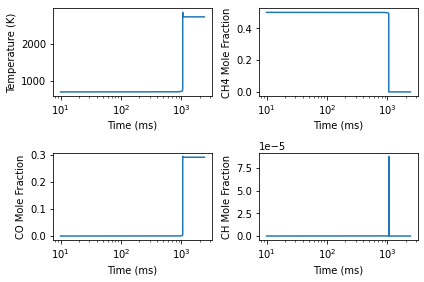

In [100]:
import matplotlib.pyplot as plt

plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
# plt.xlim([0.4,0.5])

Var = 'CH4' #'OH'
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:, gas.species_index(Var)])
plt.xlabel('Time (ms)')
plt.ylabel(Var+' Mole Fraction')
plt.xscale('log')
# plt.xlim([0.4,0.5])

Var = 'CO' #'H'
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:, gas.species_index(Var)])
plt.xlabel('Time (ms)')
plt.ylabel(Var+' Mole Fraction')
plt.xscale('log')
# plt.xlim([0.4,0.5])

Var = 'CH' #'H2'
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:, gas.species_index(Var)])
plt.xlabel('Time (ms)')
plt.ylabel(Var+' Mole Fraction')
plt.xscale('log')
# plt.xlim([0.4,0.5])

plt.tight_layout()
plt.show()

In [92]:
dT_dt       = np.gradient(states.t, states.T)
AutoIgnTime = states.t[np.nanargmax(dT_dt[0:-2])]
AutoIgnTime

/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:1072: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:1073: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:1073: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:1074: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:1074: RuntimeWarning: invalid value encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:1080: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c 

0.4901289148032051

In [104]:
states.Y[:, gas.species_index('CH')]

array([5.82624110e-38, 5.82654730e-38, 5.82687941e-38, ...,
       5.52733093e-12, 5.52733093e-12, 5.52733093e-12])

In [105]:
np.random.normal(1, 1, 100)

array([-0.38026008,  2.76915488,  0.81929183,  0.49221549,  0.74592351,
        2.50252239, -0.03856382,  0.59636554,  0.19322547,  2.14826738,
        1.7672214 ,  1.31431438,  0.0336586 ,  0.70821242,  0.95026347,
        1.49489946,  0.35739309,  2.11466833,  0.65759629,  0.88334689,
        0.13933541, -0.24429234,  0.26323614,  0.72310421,  1.04466016,
        0.91241107,  1.51387698,  2.65253072, -0.23370702,  1.62557771,
        0.06153751,  0.81248863,  1.08927313,  1.79509045,  1.34240612,
        1.34782064,  1.62861441, -0.57194036,  0.59444089,  0.22795226,
        1.44408173,  0.6992446 ,  0.37946052,  1.37883088,  1.24174268,
       -0.33344474,  0.3194784 ,  0.51356671, -0.42793265,  1.82074053,
        0.14264241,  1.72119952,  0.83960545,  0.2703199 ,  0.53893568,
        0.60250877,  1.48015723,  0.1012217 ,  1.69593422,  0.7783316 ,
        1.21565753,  0.62365067,  0.98719553, -0.09408725,  1.56391284,
        1.9948076 ,  1.08550769,  0.98598817,  1.0859412 ,  2.30